## Black Friday Dataset EDA and Feature Engineering 
#### Cleaning and Data Preprocessing for Model Training

## Problem Statement
A Retail company "ABC" pvt ltd. wanst to understand the customer purchase behaviour(Specifically, purchase amount) against various products categories. They have shared purchase summary of various products of different categories. They have shared the purchase summary of various customers for selected high volume products from the last month. The data set also contains customers for selected high volume products from last month. The data set also contains customer demographics(age, gender, marital status, city_type, stay_in_current_city), product details(product_id, and product category) and Total_purchase_amount from last month.

Now they want to build a model to predicts the purchse amount of customer against various products which will help them to create a presonalised offer for customers against different products. 

In [1]:
## Data-set link: https://www.kaggle.com/datasets/sdolezel/black-friday?select=train.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [2]:
print(os.getcwd())

C:\Users\shirs


In [3]:
os.chdir("C:/Users/shirs/OneDrive/Documents/Jupyter")

In [4]:
# Importing the Data set
df_train = pd.read_csv('blackFriday_train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df_train.shape

(550068, 12)

In [6]:
df_test = pd.read_csv('blackFriday_test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [7]:
df_test.shape

(233599, 11)

In [8]:
## Concatenate both Train and Test Data (Row-wise)
df = pd.concat([df_train, df_test], ignore_index = True)
df.shape

(783667, 12)

In [9]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [11]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [12]:
df.drop(['User_ID', 'Product_ID'], axis = 1, inplace = True)

In [13]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
## Handling Categorical Feature 'Gender'
df['Gender'] = df['Gender'].map({'F':0, 'M':1})
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [15]:
# Categorical Feature 'Age'
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [16]:
df['Age'] = df['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7 })
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [17]:
# Categorical Feature City_Category 
## Drop first category A to avoid 'Multicollinearity'. Since B and C both zero already indicates the particular Row has City category A. 
#df_city = pd.get_dummies(df['City_Category'], drop_first = True, dtype = int)
# best to use LabelEncoder from sklearn for Catergorical datatype 
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df["City_Category"] = label.fit_transform(df["City_Category"])

In [18]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,0,2,0,3,NaN,NaN,8370.0
1,0,1,10,0,2,0,1,6.0,14.0,15200.0
2,0,1,10,0,2,0,12,NaN,NaN,1422.0
3,0,1,10,0,2,0,12,14.0,NaN,1057.0
4,1,7,16,2,4+,0,8,NaN,NaN,7969.0


In [19]:
## Missing Values
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [20]:
## Replacing Missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [21]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [22]:
## Replace the missing values with Mode
df['Product_Category_2'].mode()[0]

8.0

In [23]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [24]:
df['Product_Category_2'].isnull().sum()

0

In [25]:
## Replacing the missing Values for Product_category_3 
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [26]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [27]:
df['Product_Category_3'].mode()[0]

16.0

In [28]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [29]:
df['Product_Category_3'].isnull().sum()

0

In [30]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,0,2,0,3,8.0,16.0,8370.0
1,0,1,10,0,2,0,1,6.0,14.0,15200.0
2,0,1,10,0,2,0,12,8.0,16.0,1422.0
3,0,1,10,0,2,0,12,14.0,16.0,1057.0
4,1,7,16,2,4+,0,8,8.0,16.0,7969.0


In [31]:
df.shape

(783667, 10)

In [32]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [33]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

In [34]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,0,2,0,3,8.0,16.0,8370.0
1,0,1,10,0,2,0,1,6.0,14.0,15200.0
2,0,1,10,0,2,0,12,8.0,16.0,1422.0
3,0,1,10,0,2,0,12,14.0,16.0,1057.0
4,1,7,16,2,4,0,8,8.0,16.0,7969.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  int32  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
dtypes: float64(3), int32(1), int64(5), object(1)
memory usage: 56.8+ MB


In [36]:
# Convert object into integer
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  int32  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
dtypes: float64(3), int32(2), int64(5)
memory usage: 53.8 MB


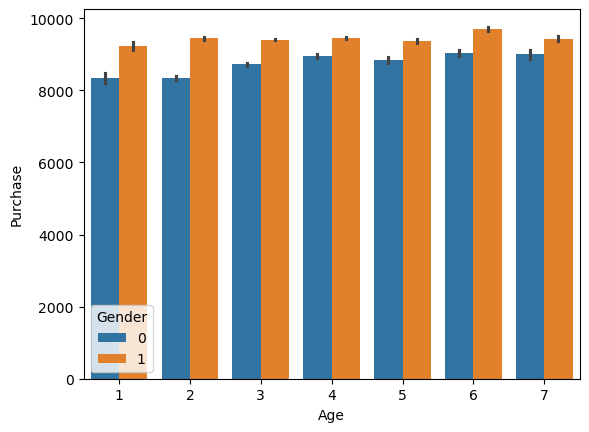

In [37]:
## Visualisation Age vs. Purchases
sns.barplot(x= 'Age', y ='Purchase', hue = 'Gender', data = df)
plt.show()

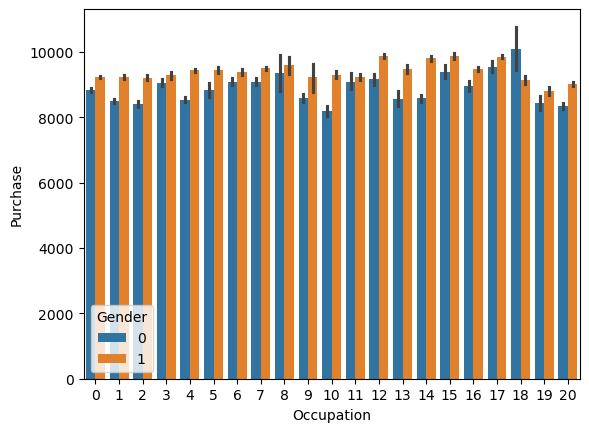

In [38]:
# Visualisation of purchase vs occupation
sns.barplot(x= 'Occupation', y ='Purchase', hue = 'Gender', data = df)
plt.show()

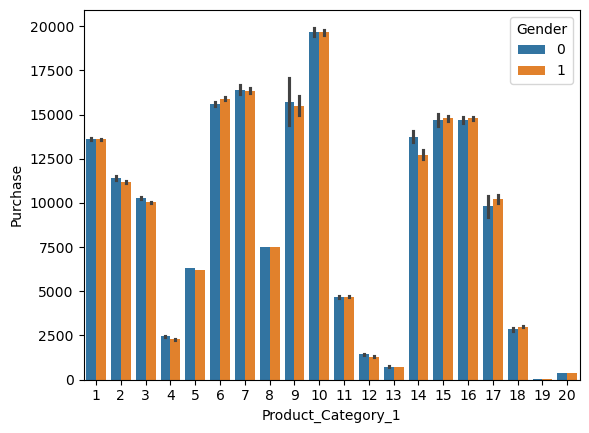

In [39]:
# Visualisation of Product_Category_1 vs Purchase
sns.barplot(x= 'Product_Category_1', y ='Purchase', hue = 'Gender', data = df)
plt.show()

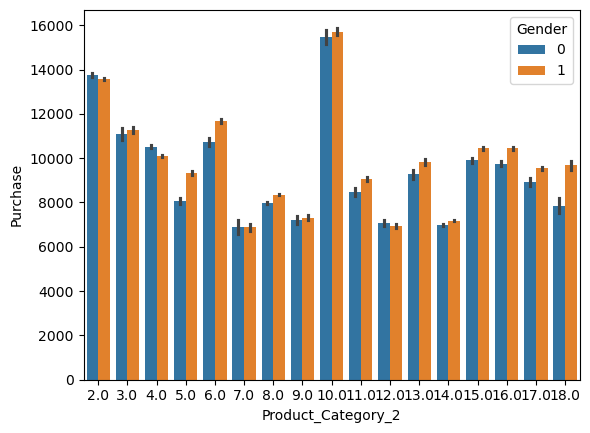

In [40]:
# Visualisation of Product_Category_2 vs Purchase
sns.barplot(x= 'Product_Category_2', y ='Purchase', hue = 'Gender', data = df)
plt.show()

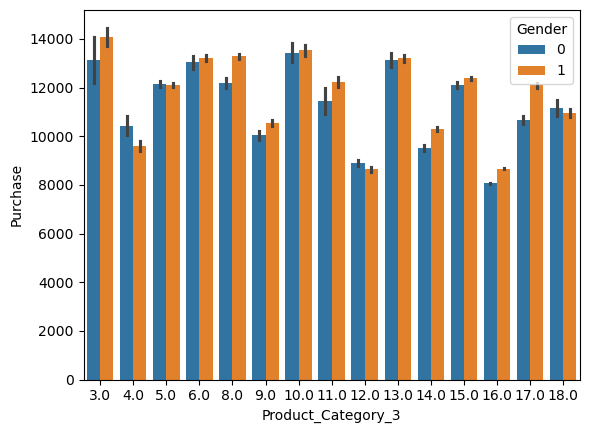

In [41]:
# Visualisation of Product_Category_3 vs Purchase
sns.barplot(x= 'Product_Category_3', y ='Purchase', hue = 'Gender', data = df)
plt.show()

In [42]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,0,2,0,3,8.0,16.0,8370.0
1,0,1,10,0,2,0,1,6.0,14.0,15200.0
2,0,1,10,0,2,0,12,8.0,16.0,1422.0
3,0,1,10,0,2,0,12,14.0,16.0,1057.0
4,1,7,16,2,4,0,8,8.0,16.0,7969.0


In [43]:
# Feature scaling
df_test = df[df['Purchase'].isnull()]
df_train = df[df['Purchase'].notnull()]

In [44]:
x_test = df_test.drop(['Purchase'], axis = 1)
x_train = df_train.drop(['Purchase'], axis = 1)
y_train = df_train["Purchase"]

In [45]:
df_test

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550068,1,5,7,1,2,1,1,11.0,16.0,NaN
550069,1,3,17,2,0,0,3,5.0,16.0,NaN
550070,0,4,1,1,4,1,5,14.0,16.0,NaN
550071,0,4,1,1,4,1,4,9.0,16.0,NaN
550072,0,3,1,2,1,0,4,5.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...
783662,0,3,15,1,4,1,8,8.0,16.0,NaN
783663,0,3,15,1,4,1,5,8.0,16.0,NaN
783664,0,3,15,1,4,1,1,5.0,12.0,NaN
783665,0,5,1,2,4,0,10,16.0,16.0,NaN


In [46]:
df_train

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,0,2,0,3,8.0,16.0,8370.0
1,0,1,10,0,2,0,1,6.0,14.0,15200.0
2,0,1,10,0,2,0,12,8.0,16.0,1422.0
3,0,1,10,0,2,0,12,14.0,16.0,1057.0
4,1,7,16,2,4,0,8,8.0,16.0,7969.0
...,...,...,...,...,...,...,...,...,...,...
550063,1,6,13,1,1,1,20,8.0,16.0,368.0
550064,0,3,1,2,3,0,20,8.0,16.0,371.0
550065,0,3,15,1,4,1,20,8.0,16.0,137.0
550066,0,7,1,2,2,0,20,8.0,16.0,365.0


In [47]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.fit_transform(x_test)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix

In [49]:
models = {"Linear_reg" : LinearRegression(),
          "KNN": KNeighborsRegressor(),
          "Dec_Tree": DecisionTreeRegressor(),
          "R_Forest": RandomForestRegressor(n_estimators= 50),
          "A_Boost": AdaBoostRegressor(),
          "G_Boost": GradientBoostingRegressor()
}

In [50]:
from sklearn.model_selection import cross_validate
from joblib import parallel_backend

In [51]:
best_model = None
best_score = -np.inf
from sklearn.metrics import mean_squared_error


with parallel_backend('loky'):
    for name, model in models.items():
        results = cross_validate(model, x_train_scaled, y_train, scoring = 'r2', cv = 3, return_estimator = True)
        mean_score = np.mean(results['test_score'])
        print(f"{name}: Mean R^2 = {mean_score:.4f}, Std Dev = {np.std(results['test_score']):.4f}")
        
     
        #step 2: Keep the best Model
        if mean_score > best_score:
            best_score = mean_score
            best_model = results['estimator'][0]
print("\nBest Model Selected:", best_model)

Linear_reg: Mean R^2 = 0.1290, Std Dev = 0.0239
KNN: Mean R^2 = 0.4951, Std Dev = 0.0013
Dec_Tree: Mean R^2 = 0.5571, Std Dev = 0.0121
R_Forest: Mean R^2 = 0.6266, Std Dev = 0.0099
A_Boost: Mean R^2 = 0.4666, Std Dev = 0.0231
G_Boost: Mean R^2 = 0.6448, Std Dev = 0.0086

Best Model Selected: GradientBoostingRegressor()


In [52]:
# by this conclude Gradient Boosting is the Best Model

In [53]:
y_pred = best_model.predict(x_test_scaled)
y_pred = np.round(y_pred, 2)
print("Predictions", y_pred)

Predictions [13333.51 10192.47  6193.78 ... 12848.45 18192.55  2488.31]


In [54]:
predictions = pd.DataFrame(y_pred, columns = ["prediction"])
predictions

,prediction
0,13333.51
1,10192.47
2,6193.78
3,3072.91
4,2913.20
...,...
233594,7501.81
233595,6219.69
233596,12848.45
233597,18192.55
